In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def load_data(l):
    data=np.loadtxt(l,delimiter=",",skiprows=1)
    X = data[:,1:]
    Y = data[:,0]
    return (X,Y)
def split(X,Y,s):
    m=X.shape[0]
    a=math.ceil(s*m)
    return(X[:a],Y[:a],X[a:],Y[a:])

def feature_eng(X,degree=5):
    X_eng=X
    degree=degree+1
    for i  in range(degree):
        for j in range(degree-i):
            for k in range(degree-i-j):
                if (i or j or k) == 0:
                    continue
                else:
                    X_eng = np.c_[X_eng, (X[:,0]**i)*(X[:,1]**j)*(X[:,2]**k)]
    print(f"shape of engineered data : {np.shape(X_eng)}")
    return X_eng

def normalise(X):
    mu=np.mean(X, axis=0)
    sigma=np.std(X, axis=0)
    X_n=(X-mu)/sigma
    return X_n

def regression(X,w,b):
    if X.ndim!=1:
        p_wb=X @ w + b
    else:
        p_wb=X*w+b
    return p_wb

def cost_function(X,Y,w,b,regression,lambda_):
    p_wb = regression(X,w,b)
    m = X.shape[0]
    cost_wb = (1/(2*m)) * np.sum((p_wb-Y)**2)
    cost_wb_r = cost_wb + ((lambda_/(2*m)) * ((np.sum(w))**2))
    return cost_wb
               
def gradient(X,Y,w,b,regression, lambda_):
    p_wb = regression(X,w,b)
    n = X.shape[1]
    m = X.shape[0]
    g_b = 0
    e = (p_wb-Y)
    g_b = (1/m) * np.sum(e)        
    g_w = (1/m) * (X.T @ e)
    return g_w,g_b
               
def gradient_descent(X,Y,w,b,alpha,steps,cost_function,gradient,lambda_):
    cost=[]
    i_list=[]
    b=b
    for i in range(steps+1):
        i_list.append(i)
        g_w, g_b = gradient(X,Y,w,b,regression,lambda_)
        w=w-alpha*g_w
        b=b-alpha*g_b
        cost.append(cost_function(X, Y, w, b, regression,lambda_))
        if i % math.ceil(steps/10) == 0:
            cst = cost[i]
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w,b,cost,i_list      

def r2score(y,f_wb):
    mu=np.mean(y,axis=0)
    r2=1-((np.sum((y-f_wb)**2))/(np.sum((y-mu)**2)))
    return r2

def plot(cost,i_list):
    plt.plot(i_list,cost,c="r",label="cost")
    plt.xlabel(f"iteration")
    plt.ylabel("cost")
    plt.title("cost vs iteration")
    plt.legend()
    plt.show()
    
def plot_data(X, Y, p):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)    
    for k in range(3):
        axs[k].scatter(X[:, k], Y, c="r", marker='x', label="true", s=12)
        axs[k].scatter(X[:, k], p, c="b", marker='o', label="predicted", s=1)
        axs[k].set_xlabel(f"Feature {k}")
        axs[k].legend()
    plt.ylabel("Target values")
    plt.tight_layout()
    plt.show()

In [3]:
X,Y = load_data("Polynomialdata_train.csv")
degree = 6
X_eng = feature_eng(X,degree)
X_new = normalise(X_eng)
test_size=0.3
X_train,Y_train,X_cv,Y_cv = split(X_new,Y,test_size)

shape of engineered data : (50000, 86)


In [4]:
print(f"max in original :{np.max(X_eng)}, min in original  :{np.min(X_eng)}")  
print(f"max in normalized :{np.max(X_new)}, min in normalized  :{np.min(X_new)}")    

max in original :252135504217851.8, min in original  :-45432446512019.4
max in normalized :105.0673195586038, min in normalized  :-110.57972542835242


In [5]:
w=np.zeros((X_train.shape[1],))
b=0
lambda_=0

In [6]:
#train
print(f"alpha: {3e-2} No. of iteration: {100000}")
print()
w_final,b_final,cost_train,i_list=gradient_descent(X_train,Y_train,w,b,3e-2,100000,cost_function,gradient,lambda_)
print()
p_train=regression(X_train,w_final,b_final)

alpha: 0.03 No. of iteration: 100000

Iteration         0, Cost: 4.96138e+13
Iteration     10000, Cost: 3.80040e+08
Iteration     20000, Cost: 2.06201e+06
Iteration     30000, Cost: 1.42934e+04
Iteration     40000, Cost: 1.27881e+02
Iteration     50000, Cost: 1.39291e+00
Iteration     60000, Cost: 1.69157e-02
Iteration     70000, Cost: 2.15825e-04
Iteration     80000, Cost: 2.81156e-06
Iteration     90000, Cost: 3.69491e-08
Iteration    100000, Cost: 4.87662e-10



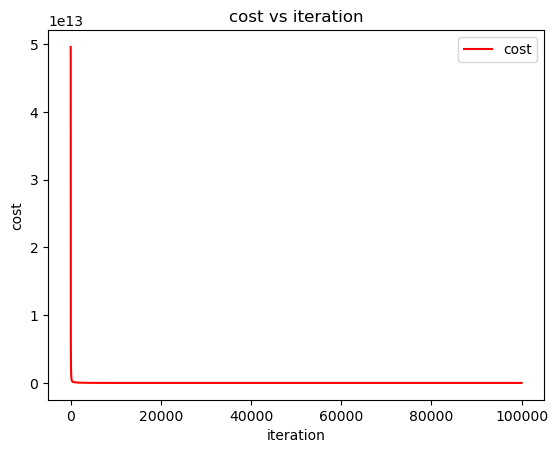

In [7]:
plot(cost_train,i_list)

In [8]:
#cross validating
cost_cv=cost_function(X_cv,Y_cv,w_final,b_final,regression,lambda_)
print(f"cost by cross validing the data: {cost_cv}")
p_cv=regression(X_cv,w_final,b_final)
r2score= r2score(Y_cv,p_cv)
print(f"r2score: {r2score}")

cost by cross validing the data: 1.6025016908342113e-09
r2score: 1.0


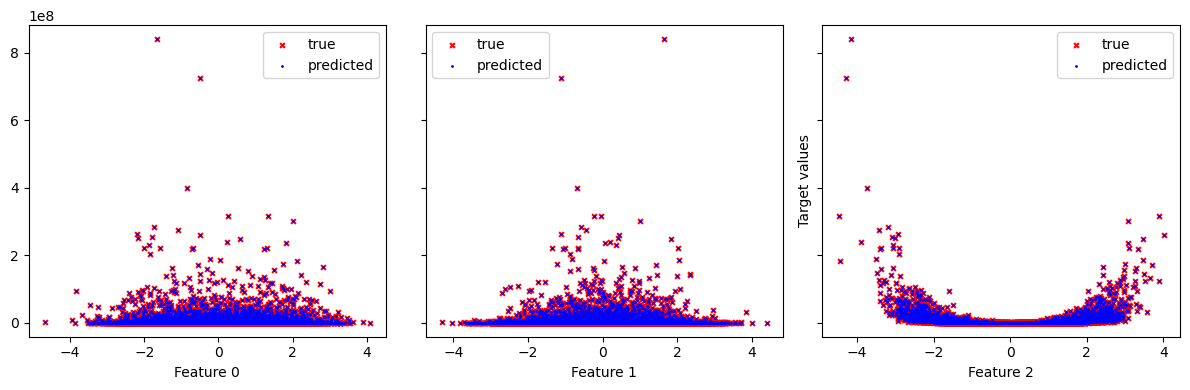

In [9]:
plot_data(X_cv,Y_cv,p_cv)

In [10]:
#testing
X_test,Y_label = load_data("Polynomialdata_test.csv")
X_test_new = feature_eng(X_test,6)
X_test_new = normalise(X_test_new)
p_test = regression(X_test_new,w_final,b_final)
np.savetxt('polynomial_test_prediction.csv', p_test, delimiter=',', header=' Test target', comments='')

shape of engineered data : (10000, 86)
